In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv("./data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
# df.head().T

In [3]:
df.sort_values(by=["saledate"], ascending=True, inplace=True)

In [4]:
df["saleyear"] = df.saledate.dt.year
df["salemonth"] = df.saledate.dt.month
df["saleday"] = df.saledate.dt.day
df["dayofweek"] = df.saledate.dt.dayofweek
df["dayofyear"] = df.saledate.dt.dayofyear
df.drop("saledate", axis=1, inplace=True)

In [5]:
df_temp = df.copy()

In [6]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


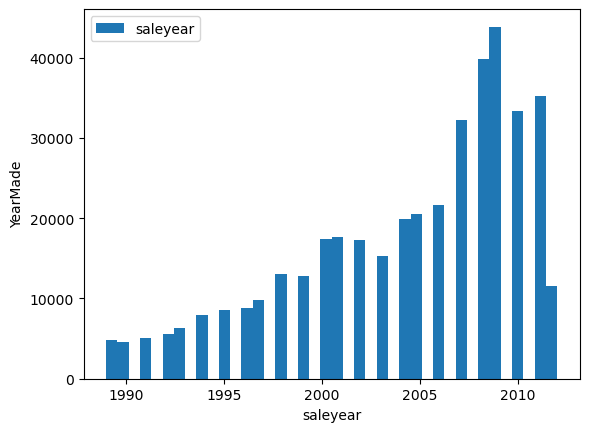

In [7]:
df.plot.hist(x= "YearMade", y = "saleyear", xlabel = "saleyear", ylabel = "YearMade", bins = 40);

In [8]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [9]:
df_temp.UsageBand.value_counts()

UsageBand
Medium    35832
Low       25311
High      12527
Name: count, dtype: int64

In [10]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [11]:
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [12]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [13]:
for label, content in df_temp.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


C:\Users\muham\AppData\Local\Temp\ipykernel_9236\4277012719.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):


In [14]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [15]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [16]:
df_temp.auctioneerID.fillna(df_temp.auctioneerID.mean(), inplace=True)

In [17]:
df_temp.auctioneerID.isna().sum()

0

In [18]:
df_temp.MachineHoursCurrentMeter.fillna(df_temp.MachineHoursCurrentMeter.mean(), inplace=True)

In [19]:
df_temp.MachineHoursCurrentMeter.isna().sum()

0

In [20]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            print(label)

In [21]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+'missing'] = pd.isnull(content)
        df_temp[label] = pd.Categorical(content).codes+1

In [22]:
df_temp.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
                           ..
Backhoe_Mountingmissing     0
Blade_Typemissing           0
Travel_Controlsmissing      0
Differential_Typemissing    0
Steering_Controlsmissing    0
Length: 101, dtype: int64

In [23]:
df_valid = df_temp[df_temp.saleyear == 2012]
df_train = df_temp[df_temp.saleyear != 2012]
x_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
x_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid.SalePrice

In [24]:
# this may take take a too much time due to large number of samples so we cut it down into small data
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)


KeyboardInterrupt: 

In [ ]:
model.score(x_valid, y_valid)

In [25]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_test, y_pred):
    """
    here we're going to build a route-mean-squared-log-error
    according to cndition given in the kaggle
    """
    return np.sqrt(mean_squared_log_error(y_test, y_pred))
    

In [44]:
def check_score(model):
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    score = {
        "Traninng MAE":mean_absolute_error(y_train, train_preds),
        "Valid MAE":mean_absolute_error(y_valid, valid_preds),
        "Tranning RMSLE":rmsle(y_train, train_preds),
        "validating RMSLE":rmsle(y_valid, valid_preds),
        "Tranning r2_score":r2_score(y_train, train_preds),
        "validiting r2_score": r2_score(y_valid, valid_preds)
    }
    return score
# check_score(model)

In [27]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [28]:
%%time
model.fit(x_train, y_train)

CPU times: total: 1min 37s
Wall time: 15.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [29]:
model.score(x_valid, y_valid)

0.8318183653114568

In [30]:
check_score(model)

{'Traninng MAE': 5566.5515673667815, 'Valid MAE': 7190.7358048906935, 'Tranning RMSLE': 0.2579428044502905, 'validating RMSLE': 0.29390183949918997, 'Tranning r2_score': 0.8604334541744706, 'validiting r2_score': 0.8318183653114568}


In [31]:

from sklearn.model_selection import RandomizedSearchCV

In [32]:
%%time
rs_grid = {
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None, 3,5,10],
    "max_features":[0.5, 1, "sqrt", "auto"],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_samples":[10000]
}

rs_model  = RandomizedSearchCV(estimator=model,random_state=42, param_distributions=rs_grid, n_jobs=-1,n_iter=5, verbose=True)
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 11.5 s
Wall time: 38.9 s


RandomizedSearchCV(estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [33]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [34]:
check_score(rs_model)

{'Traninng MAE': 8841.184110320535, 'Valid MAE': 11213.263715147612, 'Tranning RMSLE': 0.38985528357171456, 'validating RMSLE': 0.44740807936976823, 'Tranning r2_score': 0.6858466800061935, 'validiting r2_score': 0.6457212726650616}


In [35]:
rs_model.score(x_valid, y_valid)

0.6457212726650616

In [41]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=42,
                                   min_samples_split= 14,
                                   min_samples_leaf=1,
                                   max_features=0.5,
                                   max_samples=None)
ideal_model.fit(x_train, y_train)

CPU times: total: 6min 33s
Wall time: 51.6 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [45]:
check_score(ideal_model)

{'Traninng MAE': 2963.8895937516368,
 'Valid MAE': 5970.874625244722,
 'Tranning RMSLE': 0.14498268899153624,
 'validating RMSLE': 0.24661149147645403,
 'Tranning r2_score': 0.9585256426131546,
 'validiting r2_score': 0.8808964049862121}

# Now makes prediction on test data According to kaggle competition requirement

In [91]:
df_test = pd.read_csv("./data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])


In [92]:
def preprocessing_data(df):
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["dayofweek"] = df.saledate.dt.dayofweek
    df["dayofyear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)


    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            # if pd.isnull(content).sum():
            df[label+"missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [93]:
df_test = preprocessing_data(df_test)

In [94]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthmissing,Stick_Lengthmissing,Thumbmissing,Pattern_Changermissing,Grouser_Typemissing,Backhoe_Mountingmissing,Blade_Typemissing,Travel_Controlsmissing,Differential_Typemissing,Steering_Controlsmissing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [95]:
set(x_train.columns)-set(df_test.columns)

set()

In [71]:
test_preds = ideal_model.predict(df_test)

In [99]:
len(test_preds)

12457

In [100]:
# we've made a prediction but they're not in the same format as kaggle is asking for
# lets make it according the format the kaggle is required

In [102]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19125.378165
1,1227844,16120.528271
2,1227847,55055.665962
3,1227848,61878.831971
4,1227863,58650.168466
...,...,...
12452,6643171,44220.997062
12453,6643173,14030.228754
12454,6643184,13732.805859
12455,6643186,17711.658759


In [104]:
df_preds.to_csv("./data/bluebook-for-bulldozers/test_predicted_price.csv", index=False)

In [105]:
ideal_model.feature_importances_

array([3.24423041e-02, 2.04665170e-02, 4.52166185e-02, 1.98050841e-03,
       3.44143975e-03, 1.90392825e-01, 4.27380867e-03, 1.10072092e-03,
       4.56814675e-02, 5.13555521e-02, 5.83846189e-02, 4.53705527e-03,
       1.77890660e-02, 1.43867567e-01, 4.39300664e-02, 5.95502065e-03,
       4.01929249e-03, 3.05399257e-03, 2.81826032e-03, 8.91948162e-02,
       8.11972476e-04, 7.86631740e-05, 1.11661304e-03, 1.71668953e-04,
       1.59205316e-03, 2.07017088e-05, 5.20340795e-04, 3.71256942e-03,
       2.60725560e-03, 2.18069294e-04, 4.87709374e-03, 2.33357133e-03,
       4.04388972e-03, 9.01873599e-04, 3.14647405e-03, 8.44566514e-03,
       1.06014467e-03, 1.08346646e-02, 4.90946410e-03, 1.29415918e-03,
       8.38258563e-04, 8.93705093e-04, 2.37756982e-03, 6.65818169e-04,
       6.96647858e-04, 4.40082836e-04, 3.31574404e-04, 2.40935919e-03,
       6.31218243e-04, 2.75905117e-04, 1.00216320e-03, 7.39092831e-02,
       3.82241917e-03, 5.69617327e-03, 2.92083549e-03, 9.77908125e-03,
      

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({
        "features":columns,
        "feature_importance":importances})
         .sort_values("feature_importance", ascending=True)
         .reset_index(drop=False))